## Artificial Neural Network (ANN) Regression


In [1]:
# Imports
import numpy as np

import torch
import torch.nn as nn

# Pytorch Gpu Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

import matplotlib.pyplot as plt

# Matplotlib svg plots for better pictures
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

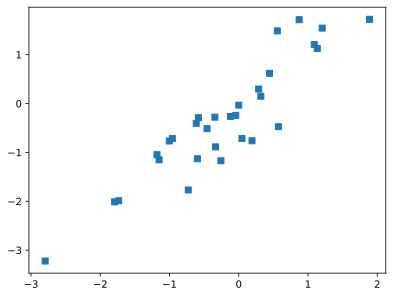

In [2]:
# Create Data
N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N, 1) / 2

# Plot the values
plt.plot(x.cpu(), y.cpu(), "s")
plt.show()

In [3]:
# Build the model
ANN_reg = nn.Sequential(
    nn.Linear(1, 1),  # This is the Input layer
    nn.ReLU(),  # Activation Function
    nn.Linear(1, 1),  # This the Output Layer
)

ANN_reg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [4]:
# Learning Rate
lr = 0.05

# Loss Function
loss_fun = nn.MSELoss()

# Optimizer (Gradient Descent flavour to implement)
optimizer = torch.optim.SGD(ANN_reg.parameters(), lr=lr)

In [ ]:
# Model training
n_epoch = 500
losses = torch.zeros(n_epoch)

for epoch in range(n_epoch):

    # Forward Propogation
    y_hat = ANN_reg(x)

    # Compute Loss
    loss = loss_fun(y_hat, y)
    losses[epoch] = loss

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

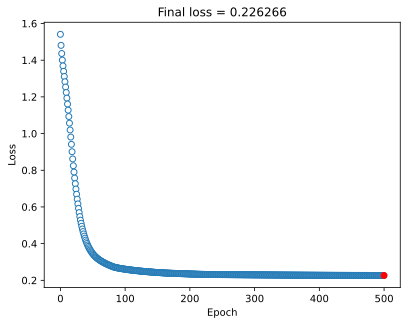

In [6]:
# Show the losses

# Final forward pass
predictions = ANN_reg(x)

# Final Loss
test_loss = (predictions - y).pow(2).mean()

plt.plot(losses.cpu().detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.plot(n_epoch, test_loss.cpu().detach(), "ro")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Final loss = %g" % test_loss.item())
plt.show()

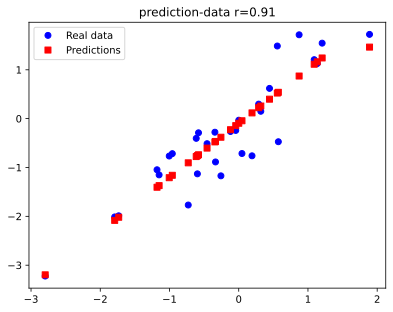

In [ ]:
plt.plot(x.cpu(), y.cpu(), "bo", label="Real data")
plt.plot(x.cpu(), predictions.cpu().detach(), "rs", label="Predictions")
plt.title(
    f"prediction-data r={np.corrcoef(y.cpu().T,predictions.cpu().detach().T)[0,1]:.2f}"
)
plt.legend()
plt.show()

### ANN Clean Code


In [ ]:
# Define a function to train the model and output the losses predictions, final loss avg and Model
def nnModel(x, y, n_epoches, lr):
    # Losses Place Holder
    losses = torch.zeros(n_epoches)

    # Model
    ANN_reg = nn.Sequential(nn.Linear(1, 1), nn.ReLU(), nn.Linear(1, 1))

    # Loss Function
    loss_func = nn.MSELoss()
    # Optimizer
    optimizer = torch.optim.SGD(ANN_reg.parameters(), lr=lr)

    # Model Training
    for epoch in range(n_epoches):
        y_hat = ANN_reg(x)
        loss = loss_func(y_hat, y)
        losses[epoch] = loss

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    ## Predictions
    predictions = ANN_reg(x)

    test_loss = (predictions - y).pow(2).mean()

    return losses, predictions, test_loss, ANN_reg

In [2]:
# Define a function to generate x and y for the given number of N
def generateData(N, m):
    x = torch.randn(N, 1)
    y = (m * x) + (torch.randn(N, 1) / 2)

    return x, y

In [ ]:
# Define a function to plot the data, loss and accuracy
def plot_data(x, y, n_epoches, losses, y_hat, test_loss):

    # Plot the raw data
    plt.plot(x.cpu(), y.cpu(), "s")
    plt.show()

    # Plot the Losses
    plt.plot(losses.cpu().detach(), "o", markerfacecolor="w", linkwidth=0.1)
    plt.plot(n_epoches, test_loss.cpu().detach(), "ro")
    plt.xlabel("Epoches")
    plt.ylabel("Loss")
    plt.title("Final Loss = %g" % test_loss.item())
    plt.show()

    # Plot the y_hat and y relation
    plt.plot(x.cpu(), y.cpu(), "bo", label="Real Data")
    plt.plot(x.cpu(), predictions.cpu().detach(), "rs", label="Predictions")
    plt.title(
        f"prediction-data r={np.corrcoef(y.cpu().T,predictions.cpu().detach().T)[0,1]:.2f}"
    )
    plt.legend()
    plt.show()